# Trying gradient boosting algorithm

In [19]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split, GridSearchCV

# Helper fuctions to evaluate our model.
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor
# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler

from sklearn.tree import plot_tree, export_text
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [20]:
df = pd.read_csv('../dataset/sonoma_county_level_encoded_numeric_value_nov_28.csv')

df.head(5)

,simplified_color,simplified_sex,intake_age,simplified_condition,simplified_type,simplified_breed,simplified_size,days_in_shelter,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded,simplified_breed_encoded,simplified_size_encoded
0,TABBY,FEMALE,0,OTHER,STRAY,DOMESTIC BREED,KITTN,81,2,0,2,2,0,0
1,TABBY,FEMALE,0,HEALTHY,OWNER SURRENDER,DOMESTIC BREED,KITTN,32,2,0,0,1,0,0
2,TABBY,FEMALE,0,HEALTHY,STRAY,DOMESTIC BREED,SMALL,94,2,0,0,2,0,2
3,TABBY,MALE,0,OTHER,STRAY,DOMESTIC BREED,KITTN,80,2,1,2,2,0,0
4,TABBY,FEMALE,0,OTHER,STRAY,DOMESTIC BREED,KITTN,70,2,0,2,2,0,0


In [21]:
df.shape

(3294, 14)

## ⬇︎⬇︎ GradientBoostingRegressor simple  ⬇︎⬇︎

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Select relevant columns
selected_columns = [ 'intake_age', 
                    'simplified_condition_encoded', 'simplified_type_encoded', 
                     'days_in_shelter']

df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('days_in_shelter', axis=1)
y = df_selected['days_in_shelter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make y_pred on the test set
y_pred = np.round(gb_model.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

Mean Squared Error: 383.9711684370258
Root Mean Squared Error: 19.595182276187835
Average Days Staying: 29.845220030349015
RMSE is less than Average Days Staying.
Mean Absolute Error: 14.97875569044006
R-squared Score: 0.205676


In [23]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_condition_encoded    0.646103
simplified_type_encoded         0.214600
intake_age                      0.139297
dtype: float64


In [24]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

# Find rows where residuals are exactly 0
zero_residuals_df = df_residuals[df_residuals['Residuals'] == 0]

# Display rows where residuals are exactly 0
print('Rows with Residuals = 0:')
print(zero_residuals_df)

Rows with Residuals = 0:
      Actual  Predicted  Residuals
1671      26       26.0        0.0
3114      42       42.0        0.0
842       46       46.0        0.0
1907      18       18.0        0.0
1868      26       26.0        0.0
2609      18       18.0        0.0
2562      18       18.0        0.0
2860      26       26.0        0.0
755       26       26.0        0.0


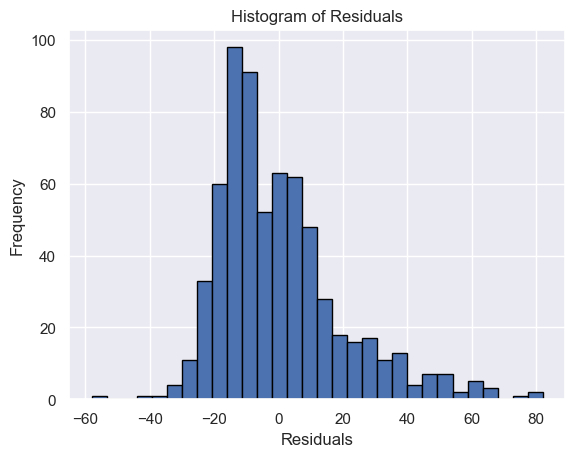

Average of Residuals: 0.0015174506828528073
Average of Absolute Residuals: 14.97875569044006


In [25]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')


In [26]:
df_residuals.head()

,Actual,Predicted,Residuals
3100,16,29.0,-13.0
3163,48,26.0,22.0
3101,14,43.0,-29.0
1947,2,26.0,-24.0
2400,20,29.0,-9.0


In [27]:
# Assuming df_residuals_sorted is your sorted DataFrame with 'Residuals' column
zero_residuals = df_residuals[df_residuals['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals
1671,26,26.0,0.0
3114,42,42.0,0.0
842,46,46.0,0.0
1907,18,18.0,0.0
1868,26,26.0,0.0
2609,18,18.0,0.0
2562,18,18.0,0.0
2860,26,26.0,0.0
755,26,26.0,0.0


## ⬆︎⬆︎ GradientBoostingRegressor simple Mean Absolute Error: 14.97875569044006 & R-squared Score: 0.205676 ⬆︎⬆︎

## ⬇︎⬇︎ GradientBoostingRegressor with GridSearchCV  ⬇︎⬇︎

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your dataframe
selected_columns = [ 'simplified_color_encoded','intake_age', 
                    'simplified_condition_encoded', 'simplified_type_encoded', 
                     'days_in_shelter']
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('days_in_shelter', axis=1)
y = df_selected['days_in_shelter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Use RandomOverSampler to handle imbalanced data
# ros = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
gb_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(gb_model.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 409.0773899848255
Root Mean Squared Error: 20.22566166988921
Average Days Staying: 29.845220030349015
RMSE is less than Average Days Staying.
Mean Absolute Error: 15.35660091047041
R-squared Score: 0.153738


In [11]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_condition_encoded    0.520790
intake_age                      0.242201
simplified_type_encoded         0.162653
simplified_color_encoded        0.074356
dtype: float64


In [12]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
3100,16,31.0,-15.0
3163,48,28.0,20.0
3101,14,46.0,-32.0
1947,2,26.0,-24.0
2400,20,31.0,-11.0
1350,49,21.0,28.0
1465,2,28.0,-26.0
239,68,49.0,19.0
203,62,47.0,15.0
3184,40,31.0,9.0


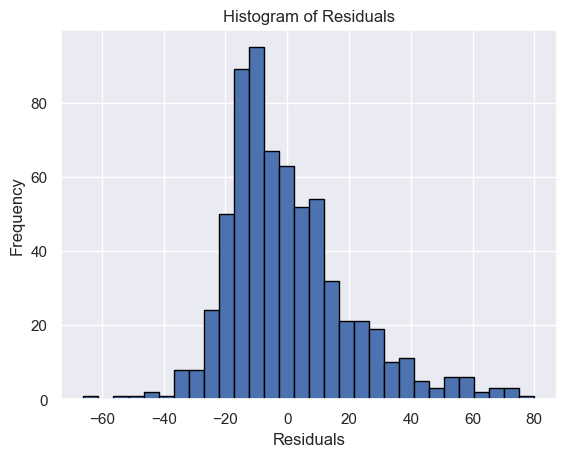

Average of Residuals: 0.048558421851289835
Average of Absolute Residuals: 15.35660091047041


In [13]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')


In [14]:
#  df_residuals
zero_residuals = df_residuals[df_residuals['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals
3045,25,25.0,0.0
1488,31,31.0,0.0
557,31,31.0,0.0
3121,17,17.0,0.0
1213,28,28.0,0.0
2238,17,17.0,0.0
2536,28,28.0,0.0
411,24,24.0,0.0
2548,41,41.0,0.0
2860,26,26.0,0.0


## ⬆︎⬆︎ GradientBoostingRegressor w GridSearchCV Mean Absolute Error: 15.35660091047041 & R-squared Score: 0.153738  ⬆︎⬆︎

## ⬇︎⬇︎ RandomForestRegressor no-sampling  ⬇︎⬇︎

In [15]:
independent_variables = [ 'simplified_color_encoded', 'simplified_sex_encoded','intake_age', 
                    'simplified_condition_encoded', 'simplified_type_encoded', 
                    'simplified_breed_encoded', 'simplified_size_encoded']
dependent_variable = 'days_in_shelter'

In [16]:

# Specify the column containing the values you want to check for uniqueness

X = df[independent_variables]
y = df[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(best_model.predict(X_test)) # 80, 80.2 (80) 81

# Evaluate the regression model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 405.430956
R-squared Score: 0.175475


In [17]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_condition_encoded    0.469931
simplified_type_encoded         0.151826
intake_age                      0.147044
simplified_color_encoded        0.091479
simplified_sex_encoded          0.057344
simplified_size_encoded         0.049102
simplified_breed_encoded        0.033274
dtype: float64


## ⬆︎⬆︎ RandomForestRegressor w GridSearchCV (R2 : 0.175475 )  ⬆︎⬆︎

In [18]:
plt.figure(figsize=(20, 10))
plot_tree(regression_forest_model.estimators_[0], feature_names=independent_variables, filled=True)
plt.title('Tree 1')
plt.show()

NameError: name 'regression_forest_model' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
y_pred

In [ ]:
print(y_test.tolist())

In [ ]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(comparison_df)

# # You can also save the DataFrame to a CSV file if you want to analyze it further
# comparison_df.to_csv('comparison_results.csv', index=False)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(comparison_df)
